<a href="https://colab.research.google.com/github/Sompote/car_cash/blob/main/predict_cash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Transformer prediciton to predict RIC combind model by Dr. Sompote Youwai 2023
import numpy as np
import pandas as pd

# Import libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

#import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense, Conv1D, Flatten, concatenate,Reshape, Dropout,Bidirectional,LayerNormalization
from keras.layers import MaxPooling1D
from keras.layers import LSTM, Dense
from keras.metrics import MeanAbsolutePercentageError
from keras import *
from keras.optimizers import Adam

df = pd.read_excel('car_cash.xlsx',sheet_name='input')
dfout=pd.read_excel('car_cash.xlsx',sheet_name='output')
datax=np.array(df)
datay=np.array(dfout)
X_train=datax[20000:21000,0:100]
X_feature=datax[20000:21000,100:103]
Y_train=datay[20000:21000,0:100]
X=X_train
Y=Y_train


X_train=X


In [5]:
transformer = models.load_model('transformerlarge13_sept.h5')
import pickle #download weight scaler
sc = pickle.load(open('scaler_x_n.pkl', 'rb'))
sc_f = pickle.load(open('scaler_f_n.pkl', 'rb'))


1/1 [==============================] - 0s 23ms/step


NameError: ignored

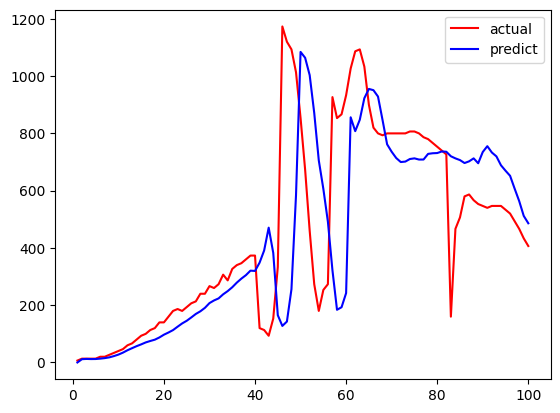

In [7]:
sample=10 #select sample to verify
Xd=X[sample-1:sample]
Yd=Y[sample-1:sample]
fd=X_feature[sample-1:sample]
Yd_nonscale=Yd


Xdd = sc.transform(Xd)
fd_s=sc_f.transform(fd)
y_ini=np.zeros((1,100))
y_ini[0,0]=0
x_train=Xdd

#predict step by step
for step in range(0,99):
  y=transformer.predict([x_train,y_ini,fd_s])
  y_ini[0,step+1]=y
y_pred=y_ini*1000

import matplotlib.pyplot as plt


# Define the x-axis and corresponding y-axis values as lists

ydist=range(1,101)

# Plot them on canvas using plt.plot() function
plt.plot( ydist,Y[sample-1],color='red',label='actual')
plt.plot( ydist,y_pred[0],color='blue',label='predict')
plt.legend()

# Give a name to x-axis and y-axis using plt.xlabel() and plt.ylabel() functions
plt.xlabel("time")
plt.ylabel("crash")

# Get the current axes instance
ax = plt.gca()


# Finally, to view your plot, we use plt.show() function
plt.show()

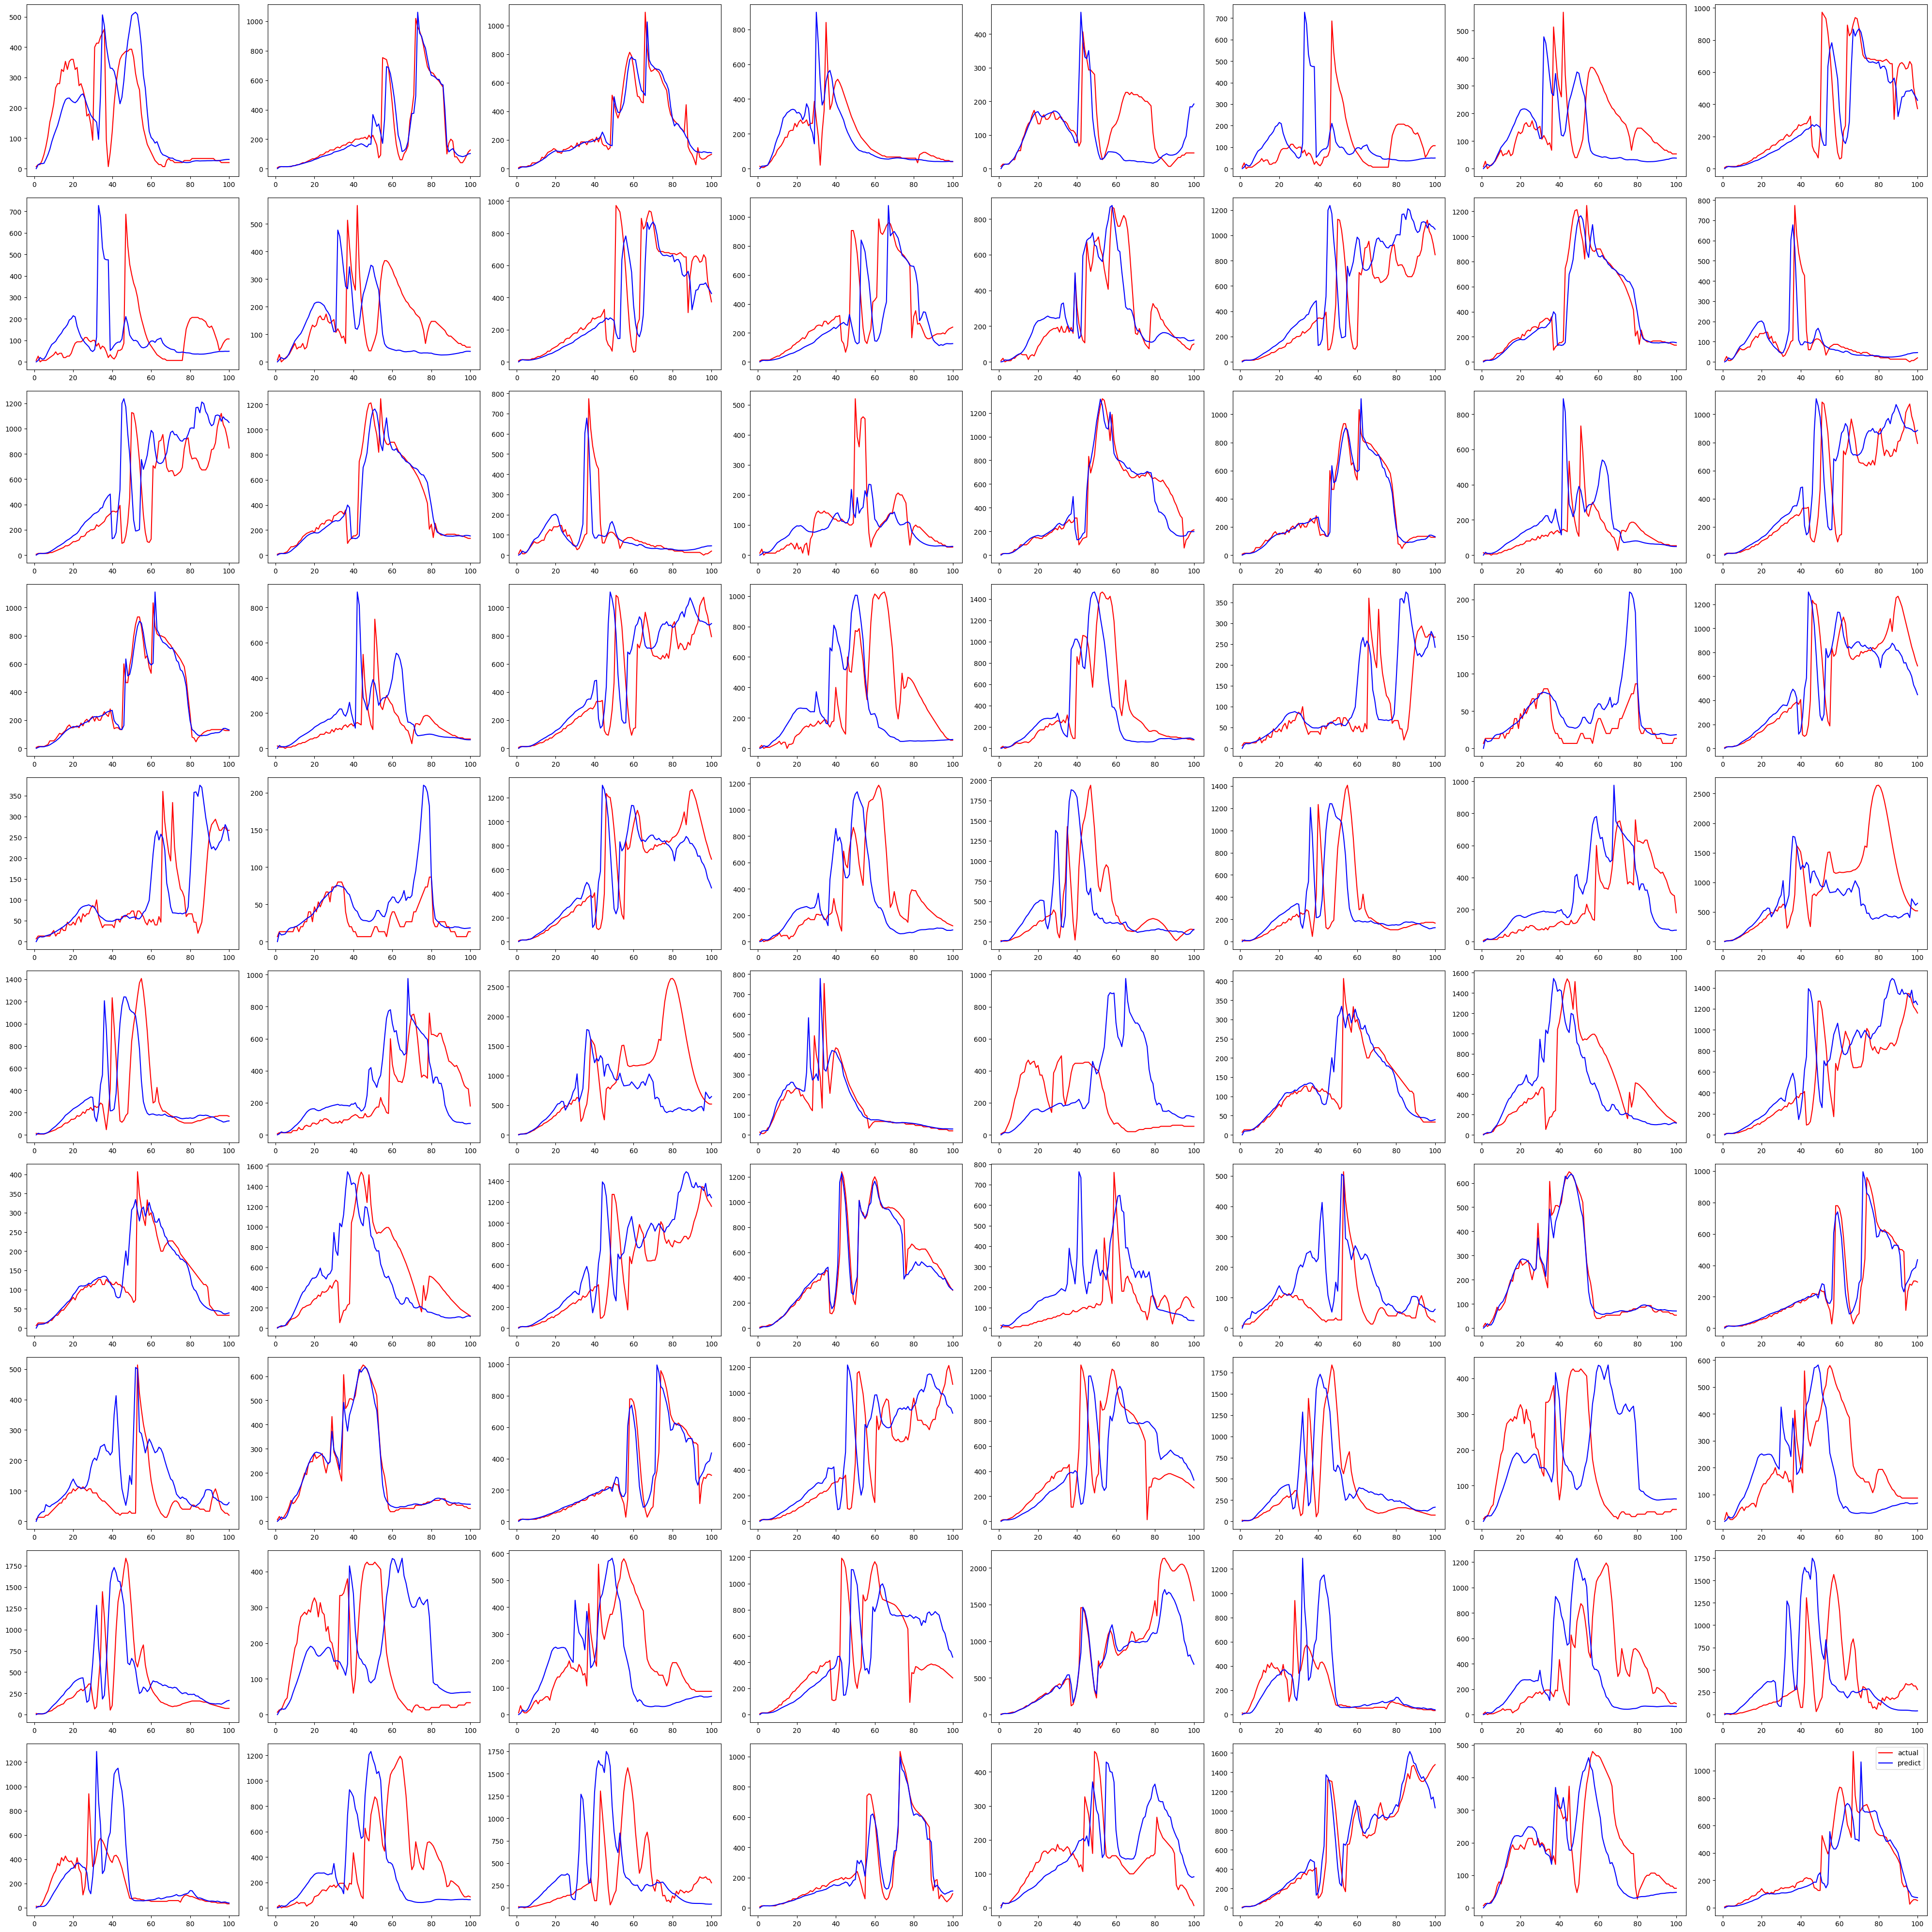

In [9]:
import matplotlib.pyplot as plt

def predict(n):
    #prepare data
    #feature=np.reshape(feature,(1,-1))
    sample=n
    Xd=X[sample-1:sample]
    Yd=Y[sample-1:sample]
    fd=X_feature[sample-1:sample]
    Yd_nonscale=Yd

    Xdd = sc.transform(Xd)
    #Yd=sc_y.transform(Yd)
    fd_s=sc_f.transform(fd)
    y_ini=np.zeros((1,100))
    y_ini[0,0]=0
    x_train=Xdd
    #y_ini=scaler_y.transform(y_ini)
    for step in range(0,99):
      y=transformer.predict([x_train,y_ini,fd_s],verbose=0)
      y_ini[0,step+1]=y
    y_pred=y_ini*1000 #linear transform
    return y_pred


ydist=range(1,101)

fig, ax = plt.subplots(nrows=10, ncols=8, figsize=(40, 40))
n= 40 #initial point off set can be st by your self
# Loop over the subplots and plot the data 40
for i in range(10):
    for j in range(8):

        y_pred=predict(n+5*i+j+1)
        ax[i, j].plot( ydist,Y[n+5*i+j],color='red',label='actual')
        ax[i, j].plot( ydist,y_pred[0],color='blue',label='predict')

plt.tight_layout()
plt.legend()
plt.show()

# Show the figure